In [1]:
import os
os.getcwd()

#permission to access drive of linked account
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#uploading the dataset zip file to google colab drive
from google.colab import files
files.upload()

Mounted at /content/gdrive


Saving Iris Dataset.csv to Iris Dataset (1).csv


{'Iris Dataset.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#reading the file
df = pd.read_csv('Iris Dataset.csv')
target = df[['Species']]
id = df[['Id']]
train = df.iloc[:,1:len(df.columns)-1]

In [4]:
target['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
dic = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
target['Species'] = target['Species'].map(dic)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#**PCA ALGORITHM**

STEP-BY-STEP Implementation of PCA (Principle Component Analysis)

1. Load the dataset
2. Normalize the data - Scaling using z-score scalar
3. Calculate the covariance matrix X of data points
4. Sort the eigen vectors according to their eigen values in decreasing order. Choose first k eigen vectors and that will be the new k dimensions.
5. Transform the original n dimensional data points into k dimensions.

In [6]:
#Normalize the data
def StandardScaler(train):
  attributes = list(train.columns)
  mean=[]
  std = []
  #calculating the mean and standard deviation of each column
  for fea in attributes:
    mean.append(np.mean(train[fea]))
    std.append(np.std(train[fea]))

  #appling StandardScaler on each element of every column
  for i in range(len(attributes)):
    lis = []
    for x in train[attributes[i]]:
       lis.append((x-mean[i])/std[i])
    train[attributes[i]] = lis
  
  train = train.to_numpy()
    
  return train
  
def PCA(data):
    #Calculate the covariance matrix X of data points
    features = data.T
    covariance_matrix = np.cov(features)
    print('covariance_matrix is : \n',covariance_matrix)
    print("In the result, all the diagonal elements are exactly same. Rest of values represeents how features are inter-related to each other")

    #Find the eigen values and eigen vector, numpy.linearalgebra.eigen
    values, vectors = np.linalg.eig(covariance_matrix)
    print("\n\nValues : " , values)
    print("Vectors : \n" , vectors)
    print("last 2 element in Values are quite low\n\n")

    #cal. percentage contribution of each eigen values
    percentage_variance = []
    for i in range(len(values)):
      percentage_variance.append(values[i]/np.sum(values))
    print("percentage_variance",percentage_variance)

    print("\nfrom the above result we decided to only keep first 2 eigen values as it has the most contributio and thus we will keep only first 2 eigen vectors as well")

    return vectors

def plot_1(result):
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.scatter( result['PC1'], result['PC2'], alpha=1, marker = '*')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA result')
    plt.legend('PCA Predicted')
    
    df0 = result[result['Species'] == 0]
    df1 = result[result['Species'] == 1]
    df2 = result[result['Species'] == 2]

    plt.subplot(1,2,2)
    plt.scatter( df0['PC1'], df0['PC2'], color='red', alpha =0.4,linewidth=2.5)
    plt.scatter( df1['PC1'], df1['PC2'], color='purple', alpha =0.2,linewidth=2.5)
    plt.scatter( df2['PC1'], df2['PC2'], color = 'yellow', alpha =0.7,linewidth=2.5)
    plt.scatter( result['PC1'], result['PC2'], alpha=1, marker = '*')
    plt.legend(['0:Iris-setosa','1:Iris-versicolor','2:Iris-virginica','PCA Predicted'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA result & Actual class distribution')


In [7]:
#Applying Normalization
train_scaled = StandardScaler(train)
train_scaled

#Applying PCA
vec = PCA(train_scaled)

covariance_matrix is : 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
In the result, all the diagonal elements are exactly same. Rest of values represeents how features are inter-related to each other


Values :  [2.93035378 0.92740362 0.14834223 0.02074601]
Vectors : 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
last 2 element in Values are quite low


percentage_variance [0.7277045209380133, 0.23030523267680647, 0.036838319576273704, 0.005151926808906404]

from the above result we decided to only keep first 2 eigen values as it has the most contributio and thus we will keep only first 2 eigen vectors as well


In [8]:
#Both vectors need to be in perpendiclar form so that we can look in dataset as a column
#Calculing train_scaled projections
projected_1 = train_scaled.dot(vec.T[0])
projected_2 = train_scaled.dot(vec.T[1])
result = pd.DataFrame(projected_1, columns = ['PC1'])
result['PC2'] = projected_2
result['Species'] = target
result

,PC1,PC2,Species
0,-2.264542,-0.505704,0
1,-2.086426,0.655405,0
2,-2.367950,0.318477,0
3,-2.304197,0.575368,0
4,-2.388777,-0.674767,0
...,...,...,...
145,1.870522,-0.382822,2
146,1.558492,0.905314,2
147,1.520845,-0.266795,2
148,1.376391,-1.016362,2


PC1 and PC2 are the 2 principal component that have calculated out from the algorithm of Principal Component Analysis

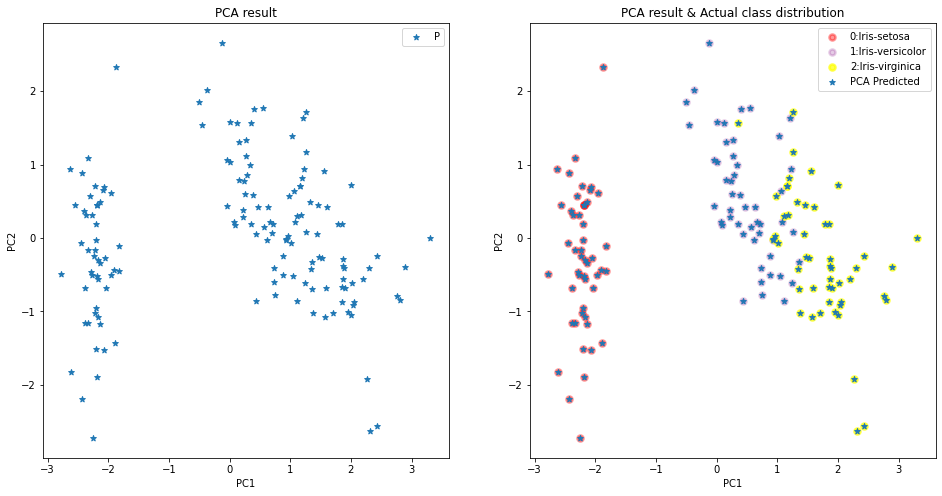

In [9]:
#Visualizing PCA results
plot_1(result)

**from PCA Algorithm, 4 features have been put into 2 featres and 2. But still we need to do some more work to get 3 clusters**

##**K-MEANS ALGORITHM**

num_clusters : how many clusters do we want to have
examples on rows, features on column

In [21]:
def initialize_random_centroids(data,k,num_fea):
    centroids = (np.random.normal(size=(k, num_fea)) * 0.0001) + np.mean(data, axis=0).reshape((1, num_fea))
    return centroids


def create_clusters(data, centroids, k):
  clusters = [ [] for _ in range(k)]
  # [ [] [] [] ... []] : k cluster

  for point_idx, point in enumerate(data):
    # point - centroids : numpy broadcasting (1,2) - (3,2) = (3,2)
    #np.argmin will give us the index of centroid closest to point
    closest_centroid = np.argmin(np.sqrt(np.sum( (point - centroids)**2, axis=1 )))
    clusters[closest_centroid].append(point_idx)
  return clusters


def update_assignments(data, centroids):
    c = []
    for i in data:
        c.append(np.argmin(np.sum((i.reshape((1, 2)) - centroids)**2, axis=1)))
    return c

def update_centroids(data, num_clusters, assignments):
    cen = []
    for c in range(len(num_clusters)):
        cen.append(np.mean([data[x] for x in range(len(data)) if assignments[x] == c], axis=0))
    return cen


def kmeans(data,k,num_features,max_iteration):
  
  #initializing the centroids
  centroids = initialize_random_centroids(data,k,num_features)

  for i in range(max_iteration):
      a = update_assignments(data, centroids)
      clusters = create_clusters(data, centroids,k)
      centroids = update_centroids(data, centroids, a)
      centroids = np.array(centroids)

  #results
  plot(result, clusters,centroids)
  res = [result,clusters,centroids]
  return(res)


def accuracy(actual, pred):

  count=0
  for i in np.arange(len(actual)):
    if actual[i] == pred[i]:
      count = count + 1
  print("Accuracy is : ", count/len(actual))


def plot(result,clusters, centroids):

    df0 = result[result['Species'] == 0]
    df1 = result[result['Species'] == 1]
    df2 = result[result['Species'] == 2]

    cluster0= result.iloc[clusters[0],:]
    cluster1 = result.iloc[clusters[1],:]
    cluster2 = result.iloc[clusters[2],:]

    plt.figure(figsize=(10,10))
    plt.scatter( df0['PC1'], df0['PC2'], color='blue', alpha =0.5,linewidth=3  )
    plt.scatter( df1['PC1'], df1['PC2'], color='brown', alpha =0.7, linewidth=3 )
    plt.scatter( df2['PC1'], df2['PC2'], color = 'yellow', alpha =1, linewidth=3 )
    plt.scatter( cluster0['PC1'], cluster0['PC2'], color='orange', alpha =1, marker = '*', )
    plt.scatter( cluster1['PC1'], cluster1['PC2'], color='black', alpha =0.9, marker = '*'  )
    plt.scatter( cluster2['PC1'], cluster2['PC2'], color = 'cyan', alpha =0.9, marker = '*')
    plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red' , marker='+', linewidth=6 )
    
    plt.title("Actual Values, Predicted Values And Centroids location as per k-means")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(['0:Iris-setosa','1:Iris-versicolor','2:Iris-virginica', 'cluster0', 'cluster1', 'cluster2', 'centroid'])
    plt.show()



(150, 2)


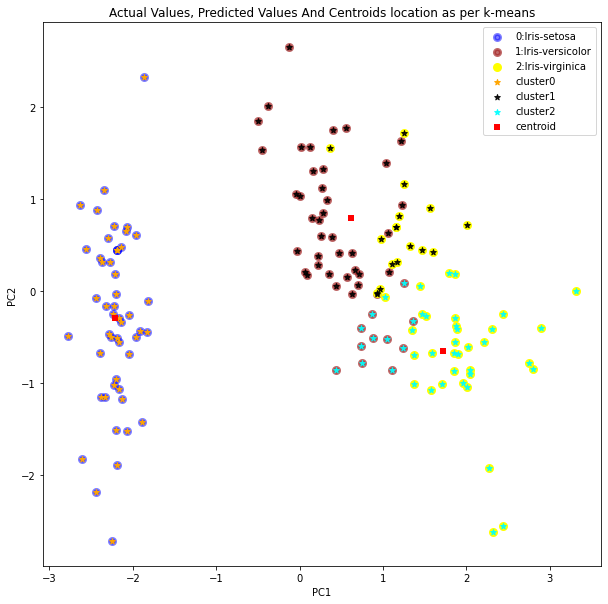

In [23]:
data = result.iloc[:,0:2].to_numpy() # (50, 2), 50 data points, 2 dimensions each
print(data.shape)
output = kmeans(data,3,2,100)

In the graph we can clearly see that k-mean algorithm is successful in dividing the data into 3 clusters represented by

 **star** (predicted values) in [black,cyan,orange]

 **dots** (actual values) in [blue, brown, yellow]
 
 **square** (centroid loaction)  [red]

In [24]:
result = output[0]
clusters = output[1]
centroids = output[2]
'''
cluster 0: 0
cluster 1 : 1
cluster 2 : 2
'''
#Creating a new column to store predicted values
result['pred_val'] = 0
result.iloc[clusters[0],[3]] = 0
result.iloc[clusters[1],[3]] = 1
result.iloc[clusters[2],[3]] = 2

#FINDING ACCURACY
accuracy(result['Species'],result['pred_val'])

Accuracy is :  0.82


#**ACCURACY IS 82%**